<a href="https://colab.research.google.com/github/HesterWen/Fashion_Mnist/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape:  (60000, 28, 28)
Testing Data Shape:  (10000, 28, 28)


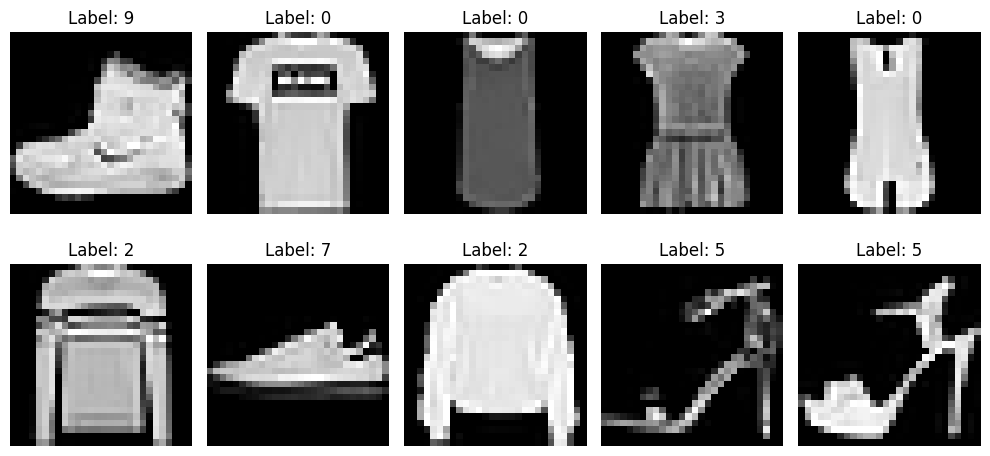

In [5]:
# 載入資料
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training Data Shape: ', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

# 顯示部分訓練圖像
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# 將像素值正規化到[0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# 重塑數據以符合 CNN 的輸入格式
# (樣本數, 高度，寬度，通道數)
X_train = X_train.reshape(-1, 28, 28, 1)  # -1:自動計算；灰階圖像通道為1
X_test = X_test.reshape(-1, 28, 28, 1)

# 類別做one hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))  # 提取更細節、複雜的特徵
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10個類別輸出

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 優化器
optim = keras.optimizers.Adam(learning_rate=0.001)
# 編譯模型
model.compile(loss='categorical_crossentropy',
       optimizer=optim,
       metrics=['accuracy'])
# 訓練模型
history = model.fit(X_train, y_train,
           batch_size=64,
           epochs=15,
           verbose=1,  # 訊息輸出的詳細程度
           shuffle=True,  # 每個epoch前都打亂數據，增加模型泛化能力
           validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.6378 - loss: 0.9860 - val_accuracy: 0.8419 - val_loss: 0.4383
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.8185 - loss: 0.4957 - val_accuracy: 0.8640 - val_loss: 0.3674
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.8432 - loss: 0.4328 - val_accuracy: 0.8777 - val_loss: 0.3270
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.8601 - loss: 0.3869 - val_accuracy: 0.8823 - val_loss: 0.3134
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.8692 - loss: 0.3651 - val_accuracy: 0.8925 - val_loss: 0.2869
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.8756 - loss: 0.3433 - val_accuracy: 0.8912 - val_loss: 0.2856
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.8803 - loss: 0.3357 - val_accuracy: 0.8964 - val_loss: 0.2734
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.8852 - loss: 0.3157 - 

In [17]:
# 測試集損失值與準確率
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss: .2f}, Test Accuracy: {test_acc: .2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9067 - loss: 0.2540
Test Loss:  0.25, Test Accuracy:  0.91


In [10]:
# history包含了模型在每個epoch的訓練過程中記錄的所有資訊
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [11]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1, len(acc) + 1)

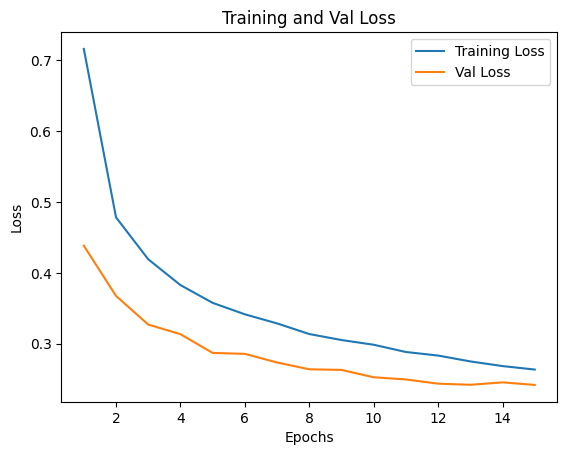

In [12]:
# 繪製損失曲線
plt.plot(epochs_, loss, label='Training Loss')
plt.plot(epochs_, val_loss, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

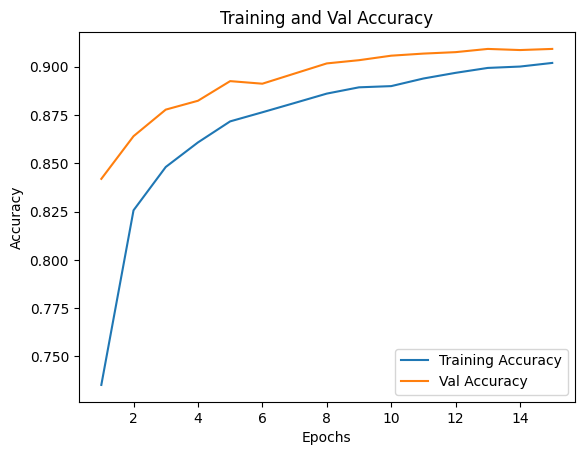

In [13]:
# 繪製準確率曲線
plt.clf()
plt.plot(epochs_, acc, label='Training Accuracy')
plt.plot(epochs_, val_acc, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


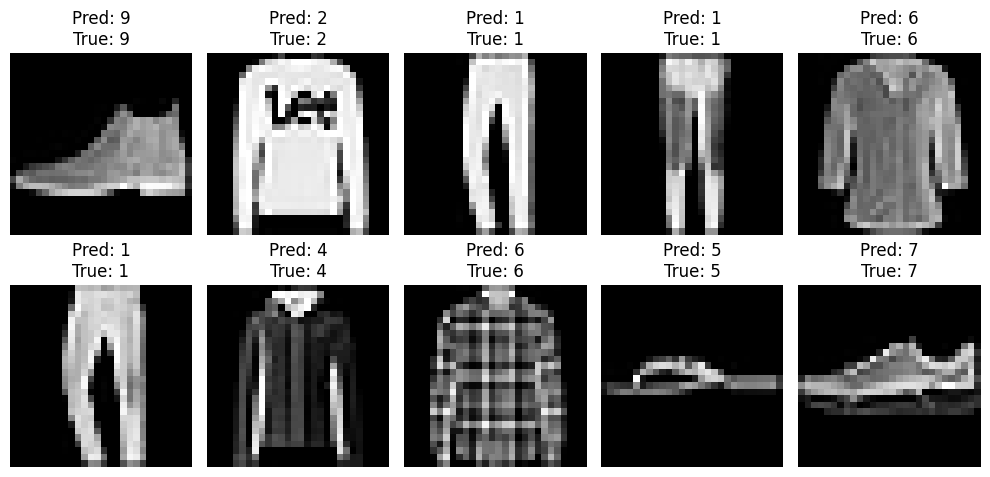

In [18]:
# 測試10張圖片，並顯示預測結果
preds = model.predict(X_test[:10])
pred_labels = np.argmax(preds, axis=1)  # 找到概率值最大的索引
true_labels = np.argmax(y_test[:10], axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # 重新整形灰階圖像
  plt.title(f"Pred: {pred_labels[i]}\nTrue: {true_labels[i]}")
  plt.axis('off')  # 隱藏座標軸
plt.tight_layout()